In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Mahbub\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

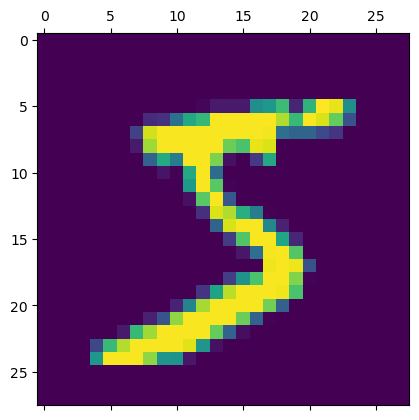

In [4]:
plt.matshow(x_train[0])

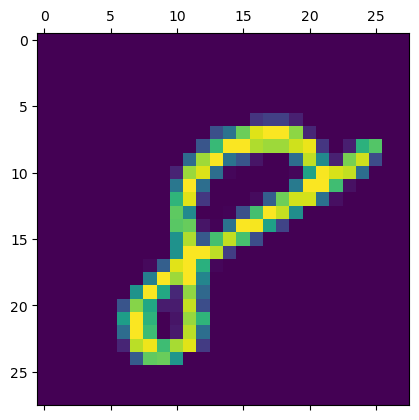

In [5]:
plt.matshow(x_train[59999])

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train[200]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train_flat = x_train.reshape(len(x_train),28*28)

In [9]:
x_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
x_train_flat.shape


(60000, 784)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_test_flat = x_test.reshape(len(x_test),28*28)

In [13]:
x_test_flat.shape

(10000, 784)

In [14]:
y_train.shape

(60000,)

In [15]:
y_test.shape

(10000,)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # 10 is the output nnetworks, 784 is the input networks, Dense means they will connect
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 736us/step - loss: 0.4668 - accuracy: 0.8788
Epoch 2/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.3040 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 1s 735us/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 1s 748us/step - loss: 0.2668 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.2619 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.2582 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.2553 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.2536 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 1s 748u

In [18]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 701us/step - loss: 0.2667 - accuracy: 0.9277


[0.26670902967453003, 0.9276999831199646]

In [19]:
y_pred = model.predict(x_test_flat)

313/313 [==============================] - 0s 625us/step


In [29]:
y_pred[0] # This will provide the value for 10 outputs. We have to take the max value from it which will be predicted value

array([3.7118190e-03, 1.3063966e-08, 1.8810673e-02, 9.6913081e-01,
       1.8294010e-03, 1.7297272e-01, 3.2912101e-08, 9.9988931e-01,
       9.3951859e-02, 6.4186668e-01], dtype=float32)

In [30]:
# Predicted first image
np.argmax(y_pred[0])

7

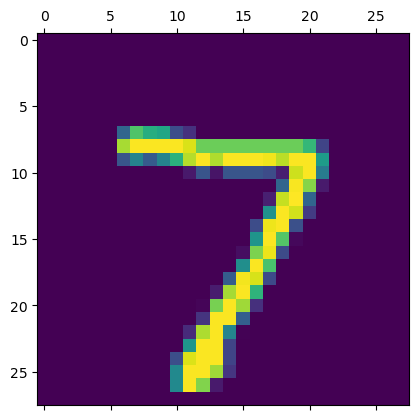

In [31]:
# Actual handwritten image
plt.matshow(x_test[0])

In [32]:
# Actual image
y_test[0]

7

In [35]:
# Extracting all the concrete y predicted values
y_pred_labels = [np.argmax(i) for i in y_pred]

In [36]:
y_pred_labels[:5] # predicted data

[7, 2, 1, 0, 4]

In [37]:
y_test[:5] # Actual data

array([7, 2, 1, 0, 4], dtype=uint8)

In [38]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

tf.Tensor(
[[ 963    0    1    2    0    5    6    2    1    0]
 [   0 1107    4    2    0    1    4    2   15    0]
 [   6    7  927   14    7    3   11    8   46    3]
 [   2    0   21  909    1   28    2   11   29    7]
 [   1    1    5    2  925    0    7    4   11   26]
 [  10    2    2   26   13  779   12    8   35    5]
 [  13    3   10    1    7   12  909    1    2    0]
 [   1    6   25    4    8    1    0  955    4   24]
 [   5    6    5   13    9   18   10   11  889    8]
 [  10    6    1    7   33    6    0   21   11  914]], shape=(10, 10), dtype=int32)


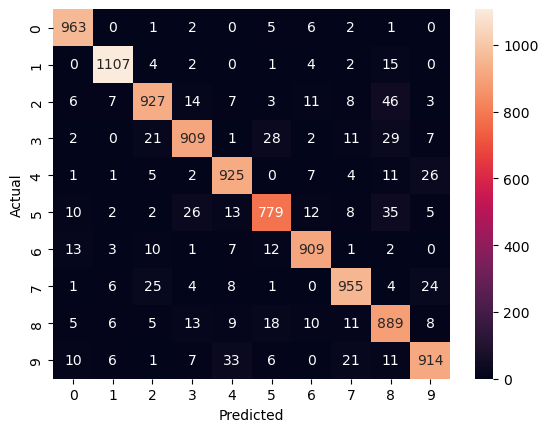

In [45]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

How to explain this?
Here is an example : 
                     
                     for digit 0, model predicted accurate ans for 963 times
                     for digit 0, model predicted 1 for 0 times
                     for digit 0, model predicted 2 for 1 times
                     for digit 0, model predicted 9 for 0 times 
                      
                      
                     for digit 3 model predicted accurate ans for 909 times
                     for digit 3 model predicted 7 for 11 times
                     for digit 3 model predicted 5 for 28 times

In [49]:
## Adding hidden layers and re fitting model
# number of nn in hidden layers can be anything but should be < input shape

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),  #hidden layer, can be added more
    keras.layers.Dense(10,activation='sigmoid') # 10 is the output nnetworks
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2718 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1236 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0647 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.0515 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.0401 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.0332 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss:

In [50]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 809us/step - loss: 0.0738 - accuracy: 0.9791


[0.07383070141077042, 0.9790999889373779]

In [54]:
y_pred = model.predict(x_test_flat)

# Extracting all the concrete y predicted values
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

313/313 [==============================] - 0s 706us/step


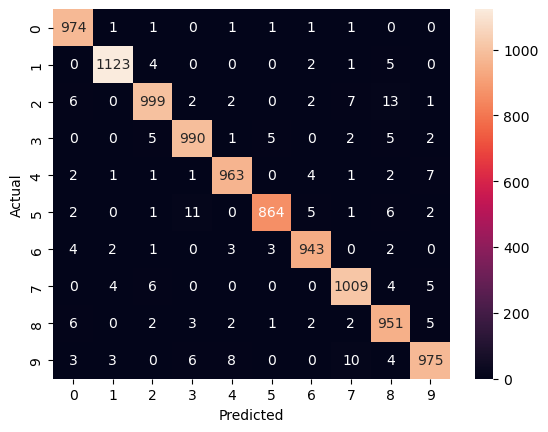

In [55]:
# Accuracy improved after adding hidden layers
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# More correct predictions